# Import des librairies



In [ ]:
import os

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product

# Import du dataset

In [ ]:
#Charger le csv
df = pd.read_csv("../datasets_source/features_compilation_ml.csv")

In [6]:
for col in ["classe", "SYM"]:
    if col in df.columns:
        df = df.drop(columns=[col])

df.head()

,len_chars_per_word,len_tokens_per_word,len_words,punct_ellipsis_ratio,punct_!_ratio,punct_?_ratio,"punct_,_ratio",punct_._ratio,punct_;_ratio,punct_:_ratio,"punct_""_ratio",punct_'_ratio,punct_(_ratio,punct_)_ratio,bert_words_len,stopwords_ratio,label
0,6.242268,1.139175,194,0.0,0.0,0.000000,0.072165,0.041237,0.0,0.0,0.000000,0.000000,0.0,0.0,229,0.344978,1
1,15.394558,1.136054,147,0.0,0.0,0.006803,0.040816,0.034014,0.0,0.0,0.000000,0.027211,0.0,0.0,178,0.443820,0
2,6.437500,1.138889,144,0.0,0.0,0.000000,0.076389,0.041667,0.0,0.0,0.000000,0.000000,0.0,0.0,170,0.358824,1
3,5.059437,1.054223,959,0.0,0.0,0.000000,0.011470,0.018770,0.0,0.0,0.006257,0.006257,0.0,0.0,1048,0.523855,0
4,5.542683,1.097561,164,0.0,0.0,0.000000,0.036585,0.042683,0.0,0.0,0.000000,0.000000,0.0,0.0,188,0.500000,1


# Preprocessing

In [7]:
#Variable cible
target = "label"

#Liste des features
features = [col for col in df.columns if col != target]

#Séparation variable / features
X = df[features]
Y = df[target]

#Couper en train et test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Sauvegarder les noms des colonnes
feature_names = X_train.columns.tolist()

#Remplir les cases vides
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Teste des modèles

## Régression logistique

### Entraînement

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(X_train, Y_train)

LogisticRegression()

### Evaluation

Accuracy sur le train set:  0.93125

Accuracy sur test set:  0.9025

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       200
           1       0.88      0.93      0.91       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



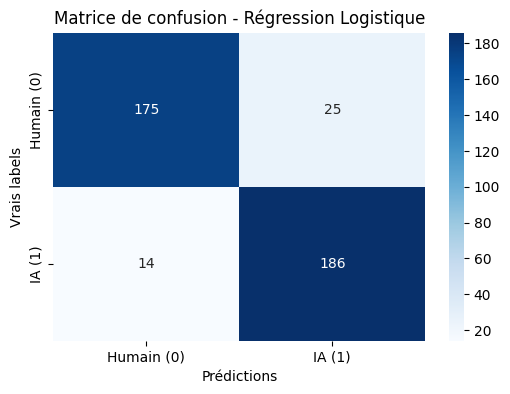

In [ ]:
print("Accuracy sur le train set: ", accuracy_score(Y_train, log_reg.predict(X_train)))

print("\nAccuracy sur test set: ", accuracy_score(Y_test, log_reg.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_test, log_reg.predict(X_test)))

#Générer une matrice de confusion
cm_lr = confusion_matrix(Y_test, log_reg.predict(X_test))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

La régression logistique marche bien. 0.90 sur le test.

## Random Forest

### Entraînement

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

RandomForestClassifier()

### Evaluation

Accuracy sur le train set:  1.0

Accuracy sur test set:  0.96

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       200
           1       0.95      0.97      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



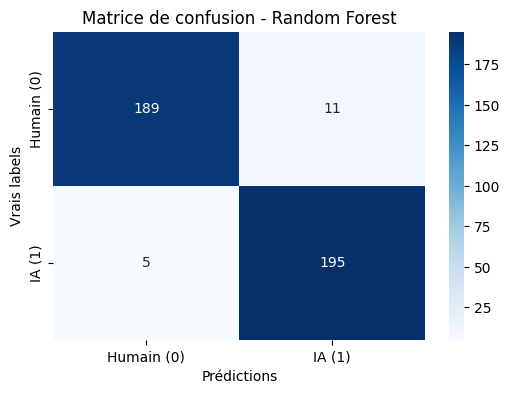

In [ ]:
print("Accuracy sur le train set: ", accuracy_score(Y_train, rf.predict(X_train)))

print("\nAccuracy sur test set: ", accuracy_score(Y_test, rf.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_test, rf.predict(X_test)))

#Générer une matrice de confusion
cm_rf = confusion_matrix(Y_test, rf.predict(X_test))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - Random Forest")
plt.show()

La random forest marche encore mieux ! 0.95 sur le test.

## SVM

### Entraînement

In [ ]:
svc = SVC(kernel="rbf", probability=True)

svc.fit(X_train, Y_train)

SVC(probability=True)

### Evaluation

Accuracy sur le train set:  0.975625

Accuracy sur test set:  0.945

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       200
           1       0.94      0.95      0.95       200

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



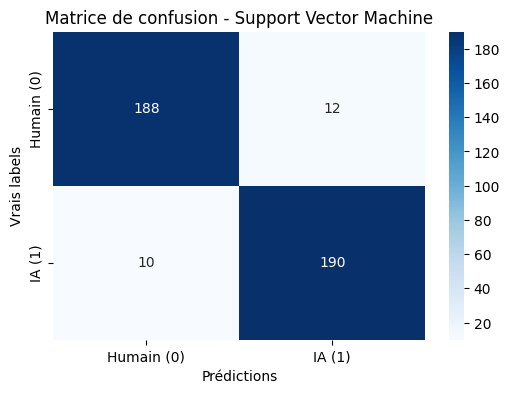

In [ ]:
print("Accuracy sur le train set: ", accuracy_score(Y_train, svc.predict(X_train)))

print("\nAccuracy sur test set: ", accuracy_score(Y_test, svc.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_test, svc.predict(X_test)))

#Générer une matrice de confusion
cm_svc = confusion_matrix(Y_test, svc.predict(X_test))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - Support Vector Machine")
plt.show()

Le SVM semble un peu moins bon. 0.94 sur le test.

## XGBoost

### Entraînement

In [ ]:
xgb = XGBClassifier(eval_metric="logloss")

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Evaluation

Accuracy sur le train set:  1.0

Accuracy sur test set:  0.9675

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       200
           1       0.95      0.98      0.97       200

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



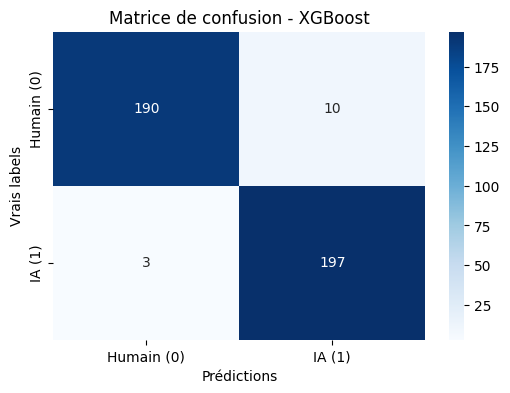

In [ ]:
print("Accuracy sur le train set: ", accuracy_score(Y_train, xgb.predict(X_train)))

print("\nAccuracy sur test set: ", accuracy_score(Y_test, xgb.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_test, xgb.predict(X_test)))

#Générer une matrice de confusion
cm_xgb = confusion_matrix(Y_test, xgb.predict(X_test))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - XGBoost")
plt.show()

Les résultat d'XGBoost sont très bons, avec 0.96 sur le test.

## Conclusion

Les quatres modèles se généralisent bien à de nouvelles données, mais issues du même dataset. Pour connaître l'efficacité réelle des modèles, il va falloir les tester sur de nouveaux datasets contenant plus de variétés de textes et faire une cross-validation pour s'assurer de la généralisation des résultats.

## Tester sur un nouveau dataset

In [ ]:
##### Import du dataset #####
#Charger le csv
df_2 = pd.read_csv("../datasets_source/features_ia_vs_humain_ml - DATASET-TEST.csv")

#Retirer la colonne "classe" doublon de label
df_2 = df_2.drop(columns=["classe"])

##### Preprocessing #####
#Variable cible
target = "label"

#Liste des features
features = [col for col in df_2.columns if col != target]

#Séparation variable / features
X_2 = df_2[features]
Y_2 = df_2[target]

#Remplir les cases vides
X_2 = X_2[imputer.feature_names_in_]
X_2 = imputer.transform(X_2)

#Standardiser les données
X_2 = scaler.transform(X_2)

Saving features_ia_vs_humain_ml - DATASET-TEST.csv to features_ia_vs_humain_ml - DATASET-TEST (1).csv


### Régression logistique

Accuracy sur le dataset 2:  0.9225

Accuracy sur dataset 1:  0.9025

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      1000
           1       0.92      0.92      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



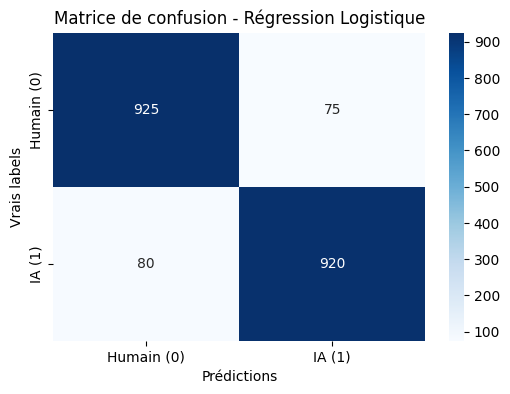

In [ ]:
print("Accuracy sur le dataset 2: ", accuracy_score(Y_2, log_reg.predict(X_2)))

print("\nAccuracy sur dataset 1: ", accuracy_score(Y_test, log_reg.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_2, log_reg.predict(X_2)))

#Générer une matrice de confusion
cm_lr = confusion_matrix(Y_2, log_reg.predict(X_2))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - Régression Logistique")
plt.show()

### Random Forest

Accuracy sur le dataset 2:  0.9805

Accuracy sur dataset 1:  0.96

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



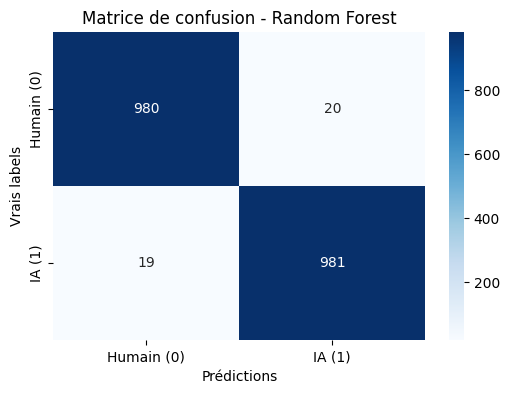

In [ ]:
print("Accuracy sur le dataset 2: ", accuracy_score(Y_2, rf.predict(X_2)))

print("\nAccuracy sur dataset 1: ", accuracy_score(Y_test, rf.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_2, rf.predict(X_2)))

#Générer une matrice de confusion
cm_rf = confusion_matrix(Y_2, rf.predict(X_2))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - Random Forest")
plt.show()

### SVM

Accuracy sur dataset 2:  0.969

Accuracy sur le dataset 1:  0.945

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1000
           1       0.96      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



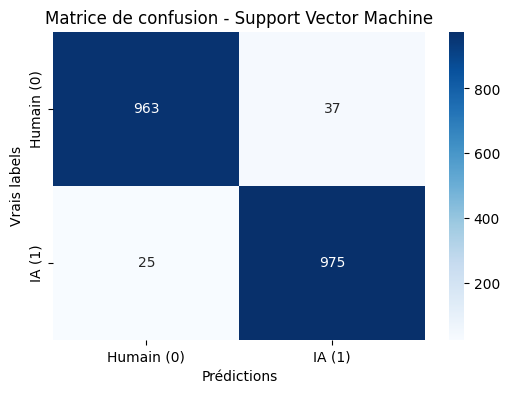

In [ ]:
print("Accuracy sur dataset 2: ", accuracy_score(Y_2, svc.predict(X_2)))

print("\nAccuracy sur le dataset 1: ", accuracy_score(Y_test, svc.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_2, svc.predict(X_2)))

#Générer une matrice de confusion
cm_svc = confusion_matrix(Y_2, svc.predict(X_2))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - Support Vector Machine")
plt.show()

### XGBoost

Accuracy sur le dataset 2:  0.9825

Accuracy sur le dataset 1:  0.9675

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



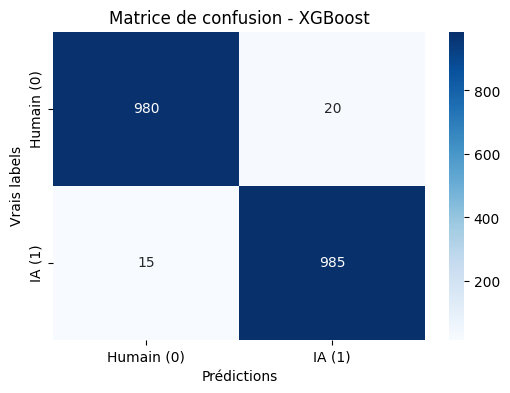

In [ ]:
print("Accuracy sur le dataset 2: ", accuracy_score(Y_2, xgb.predict(X_2)))

print("\nAccuracy sur le dataset 1: ", accuracy_score(Y_test, xgb.predict(X_test)))

print("\nEnsemble des métriques:\n", classification_report(Y_2, xgb.predict(X_2)))

#Générer une matrice de confusion
cm_xgb = confusion_matrix(Y_2, xgb.predict(X_2))

#Tracer la heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Humain (0)", "IA (1)"],
            yticklabels=["Humain (0)", "IA (1)"])

plt.xlabel("Prédictions")
plt.ylabel("Vrais labels")
plt.title("Matrice de confusion - XGBoost")
plt.show()

### Conclusion

Notre dataset initial semblent contenir des textes trop peu diversifiés. Notre mmodèle est donc très bon dessus, mais se généralise très mal sur de nouvelles données.

Nous allons aggrandir notre dataset d'entraînement afin de posséder davantages de données, et des données plus diversifiées.

Note: Le dataset inital a été amélioré. Les résultats sont maintenant bien meilleurs sur de toutes nouvelles données issues d'un nouveau dataset.

# Fine-tune des modèles

## Fonction de fine-tuning

In [ ]:
def get_best_model(param_grid, model):

  results = {}

  #Initialiser la gridsearch
  gridsearch = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

  #Entraîner les modèles
  gridsearch.fit(X_train, Y_train)

  #Afficher les meilleurs hyperparamètres
  print("Meilleurs paramètres:", gridsearch.best_params_)

  #Meilleur modèle
  best_model = gridsearch.best_estimator_

  #Prédiction
  y_pred_train = best_model.predict(X_train)
  y_pred_test = best_model.predict(X_test)

  #Sortir les métriques
  print("\nAccuracy sur le train set: ", accuracy_score(Y_train, y_pred_train))
  print("\nAccuracy sur test set: ", accuracy_score(Y_test, y_pred_test))
  print("\nEnsemble des métriques:\n", classification_report(Y_test, y_pred_test))

  #Générer une matrice de confusion
  cm = confusion_matrix(Y_test, y_pred_test)

  #Tracer la heatmap
  plt.figure(figsize=(6,4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=["Humain (0)", "IA (1)"],
              yticklabels=["Humain (0)", "IA (1)"])

  plt.xlabel("Prédictions")
  plt.ylabel("Vrais labels")
  plt.title("Matrice de confusion")
  plt.show()

  #Enregistrer le meilleur modèle et ses métriques
  results = {
      "model": model,
      "trained_model": best_model,
      "best_paramaters": gridsearch.best_params_,
      "train_accuracy": accuracy_score(Y_train, y_pred_train),
      "test_accuracy": accuracy_score(Y_test, y_pred_test),
      "train_precision": precision_score(Y_train, y_pred_train),
      "test_precision": precision_score(Y_test, y_pred_test),
      "train_recall": recall_score(Y_train, y_pred_train),
      "test_recall": recall_score(Y_test, y_pred_test),
      "train_f1": f1_score(Y_train, y_pred_train),
      "test_f1": f1_score(Y_test, y_pred_test)
  }

  #Retourner les résultats
  return results

## Régression logistique

Meilleurs paramètres: {'C': 45, 'max_iter': 30, 'penalty': 'l2', 'solver': 'lbfgs'}

Accuracy sur le train set:  0.9325

Accuracy sur test set:  0.9025

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       200
           1       0.88      0.93      0.91       200

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



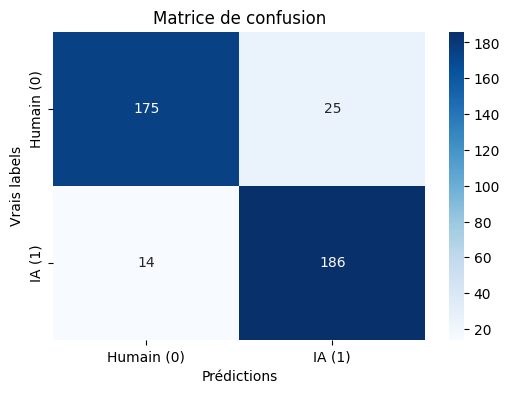

In [ ]:
#Définir les hyperparamètres à tester
param_grid = {
    "C": [0.01, 0.05, 0.1, 0.5, 1, 3, 5, 7, 10, 15, 30, 40, 45, 50, 100],
    "penalty": ["l2"],
    "max_iter": [10, 30, 50, 100, 150, 200, 500, 1000, 5000, 10000],
    "solver": ["lbfgs"]
}

#Initialiser la régression logistique
lr = LogisticRegression()

#Obtenir le meilleur modèle
result_lr = get_best_model(param_grid, lr)

Meilleurs paramètres: {'C': 45, 'max_iter': 30, 'penalty': 'l2', 'solver': 'lbfgs'}

## Random Forest

Meilleurs paramètres: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

Accuracy sur le train set:  1.0

Accuracy sur test set:  0.955

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       200
           1       0.94      0.97      0.96       200

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



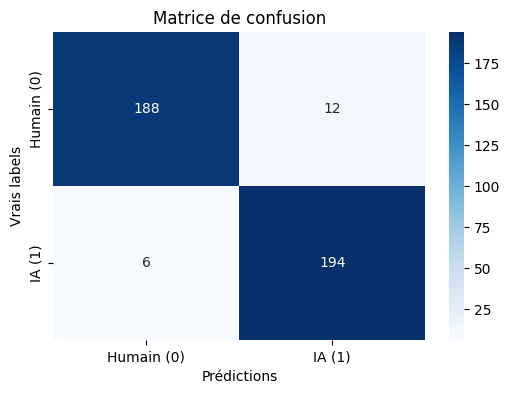

In [ ]:
#Définir les hyperparamètres à tester
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", None]
}

#Initialiser la random forest
rf = RandomForestClassifier()

#Obtenir le meilleur modèle
result_rf = get_best_model(param_grid, rf)

Meilleurs paramètres: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

## SVM

Trop long a fine tuner et les résultats du SVM n'étaient pas meilleurs que ceux des autres modèles. On se concentre donc sur les autres.

## XGBoost

Meilleurs paramètres: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}

Accuracy sur le train set:  1.0

Accuracy sur test set:  0.9625

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       200
           1       0.96      0.97      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



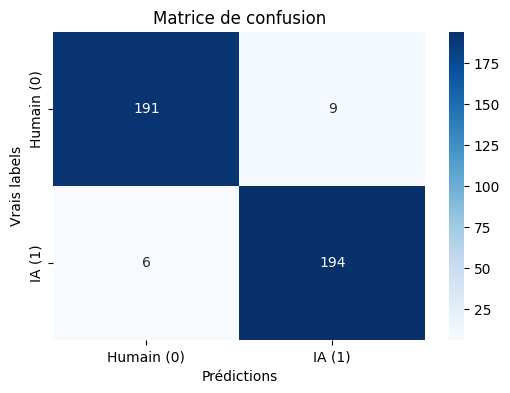

In [ ]:
#Définir les hyperparamètres à tester
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.2, 0.3, 0.4],
    "min_child_weight": [1, 3],
    "subsample": [0.8, 1.0],
    "gamma": [0, 0.5]
}

#Initialiser XGBoost
xgb = XGBClassifier()

#Obtenir le meilleur modèle
result_xgb = get_best_model(param_grid, xgb)

Meilleurs paramètres: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}

## Enregistrement des meilleurs modèles dans un dataframe

In [ ]:
models = [result_lr, result_rf, result_xgb]

df_models = pd.DataFrame(models)

# Voting & Stacking

## Voting

Meilleurs paramètres: {'voting': 'soft', 'weights': [1, 2, 2]}

Accuracy sur le train set:  1.0

Accuracy sur test set:  0.96

Ensemble des métriques:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       200
           1       0.95      0.97      0.96       200

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



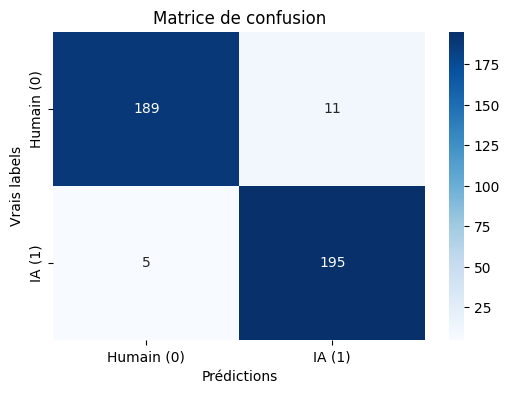

In [ ]:
#Définir les hyperparamètres à tester
param_grid = {
    "voting": ["soft", "hard"],
    "weights": [
        [1, 1, 1],
        [2, 1, 1],
        [1, 2, 1],
        [1, 1, 2],
        [1, 2, 2],
        [2, 1, 2],
        [2, 2, 1]
    ]
}

#Définir les modèles à assembler
estimators = [
    ("lr", df_models["trained_model"][0]),
    ('rf', df_models['trained_model'][1]),
    ('xgb', df_models["trained_model"][2])
]

#Initialiser le voting
voting = VotingClassifier(estimators=estimators)

#Obtenir le meilleur modèle
result_voting = get_best_model(param_grid, voting)

Meilleurs paramètres: {'voting': 'soft', 'weights': [1, 2, 2]}

## Stacking

In [1]:
#Définir les hyperparamètres à tester
param_grid = {
    "final_estimator": [
        LogisticRegression(max_iter=5000),
        RandomForestClassifier(n_estimators=100)
    ],
    "passthrough": [True, False],
    "cv": [5, 10]
}

#Définir les modèles à assembler
estimators = [
    ("lr", df_models["trained_model"][0]),
    ('xgb', df_models["trained_model"][2])
]

#Initialiser le stacking
stacking = StackingClassifier(estimators=estimators)

#Obtenir le meilleur modèle
result_stacking = get_best_model(param_grid, stacking)

NameError: name 'LogisticRegression' is not defined

Meilleurs paramètres: {'cv': 10, 'final_estimator': LogisticRegression(max_iter=5000), 'passthrough': False}

## Enregistrement des meilleurs modèles

In [ ]:
models = [result_voting, result_lr]

df_models = pd.concat([df_models, pd.DataFrame(models)], ignore_index=True)

In [ ]:
df_models.to_csv('best_models_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Faire baisser l'overfitting sur XGBoost

In [16]:
#Paramètres de base
fixed_params = {
    'learning_rate': 0.3,
    "n_estimators": 300,
    "random_state": 42
  }

#Paramètres à tester
param_grid = {
    "max_depth": [3, 4, 5],
    "min_child_weight": [5, 10, 15, 20],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 1, 2, 5]
}

resultats = []

#Générer les combinaisons
keys = param_grid.keys()
values = param_grid.values()

for combination in product(*values):
  params = dict(zip(keys, combination))
  params.update(fixed_params)

  #Entrâiner le modèle
  xgb = XGBClassifier(**params)
  xgb.fit(X_train, Y_train)

  #Prédictions
  y_train_pred = xgb.predict(X_train)
  y_test_pred = xgb.predict(X_test)

  #Calcule des métriques
  train_acc = accuracy_score(Y_train, y_train_pred)
  test_acc = accuracy_score(Y_test, y_test_pred)

  resultats.append({
      "max_depth": params["max_depth"],
      'min_child_weight': params['min_child_weight'],
      'subsample': params['subsample'],
      'gamma': params['gamma'],
      'train_accuracy': train_acc,
      'test_accuracy': test_acc,
      'diff_train_test': train_acc - test_acc,
      'precision': precision_score(Y_test, y_test_pred),
      'recall': recall_score(Y_test, y_test_pred),
      'f1_score': f1_score(Y_test, y_test_pred)
  })

#Créer un dataframe et trier par plus petit overfitting
df_results = pd.DataFrame(resultats)
df_results = df_results.sort_values("diff_train_test")

Meilleurs paramètres: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 1.0}

In [ ]:
df_results.to_csv('best_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>